In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
stock = pd.read_csv('HPG Historical Data.csv')

In [3]:
stock['Date'] = pd.to_datetime(stock['Date'])



In [4]:
stock['Price'] = stock['Price'].str.replace(',', '').astype(float)
stock['Open'] = stock['Open'].str.replace(',', '').astype(float)
stock['High'] = stock['High'].str.replace(',', '').astype(float)
stock['Low'] = stock['Low'].str.replace(',', '').astype(float)
stock['Vol.'] = stock['Vol.'].str.replace('M', '').astype(float)
stock['Change %'] = stock['Change %'].str.replace('%', '').astype(float)


In [5]:
#How many Average days per year 
print(stock['Date'].dt.year.value_counts().mean())


218.0


In [6]:
# Conduct basic statistics on the stock data 
stock.describe()



,Price,Open,High,Low,Vol.,Change %
count,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000
mean,19249.098318,19261.464985,19541.894801,18986.827905,24.253647,0.064274
std,9780.769912,9809.760926,9929.208070,9676.520954,15.021485,2.374579
min,7411.800000,7000.000000,7640.600000,6977.200000,3.320000,-7.000000
25%,11605.100000,11613.900000,11736.650000,11445.475000,13.192500,-1.132500
50%,14957.300000,14944.750000,15183.600000,14719.000000,21.025000,0.000000
75%,24003.825000,24081.000000,24339.325000,23621.425000,31.202500,1.222500
max,43895.800000,43895.800000,44198.500000,43517.400000,109.620000,6.940000


In [6]:
#Examine the seasonality of the stock price
from statsmodels.tsa.seasonal import seasonal_decompose
df_season = pd.read_csv('HPG Historical Data.csv', parse_dates=['Date'], index_col='Date')
df_season['Price'] = df_season['Price'].str.replace(',', '').astype(float)
df_season.sort_index(inplace=True)
df_season = df_season[['Price']]

print(df_season.shape)

(1308, 1)


<Axes: xlabel='Date'>

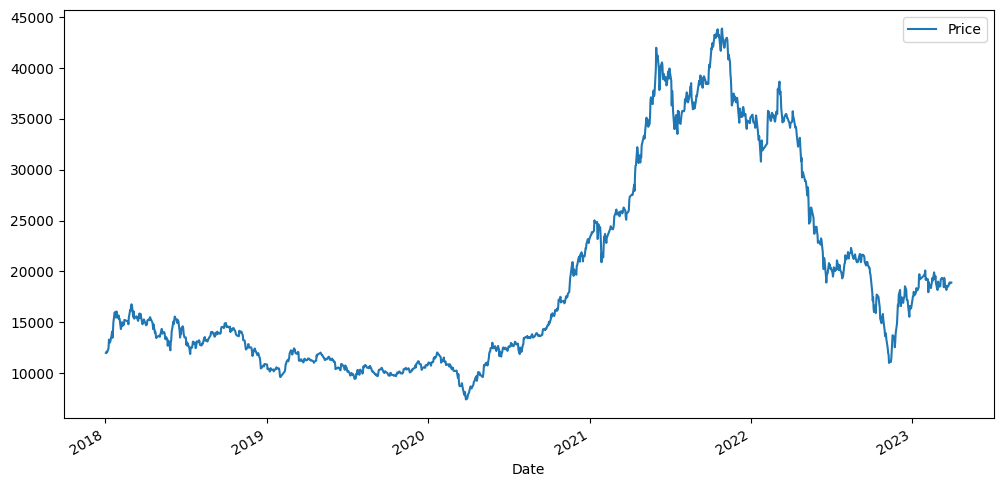

In [8]:
df_season.plot(figsize = (12, 6))

In [9]:
df_season.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1308 entries, 2018-01-02 to 2023-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   1308 non-null   float64
dtypes: float64(1)
memory usage: 20.4 KB


<Axes: xlabel='Date'>

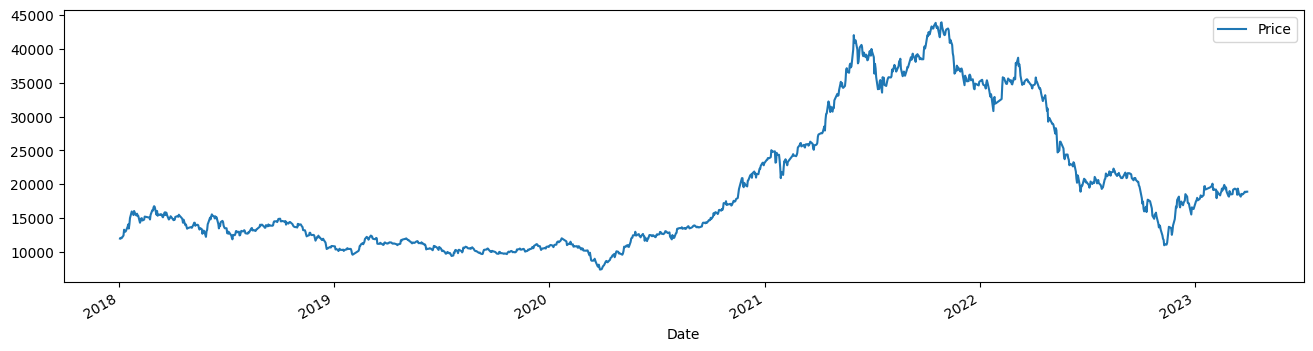

In [10]:
df_season.plot(figsize=(16, 4))


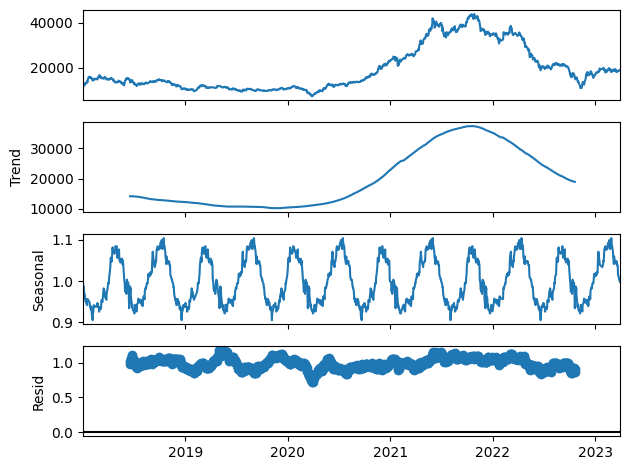

In [7]:
result = seasonal_decompose(df_season, model='multiplicative',period = 218)
result.plot()
plt.show()

In [12]:

 
# Calculate average  percentage change in stock price of the first day of the month
stock['month'] = stock.index.month
stock['day'] = stock.index.day 
stock['year'] = stock.index.year 

# Filter row that has the smallest day of the month
stock_smallest_day = stock.loc[stock.groupby(['year', 'month'])['day'].idxmin()]
stock_smallest_day.head(30)
# delete other coumns except Price , month and year
stock_smallest_day_new = stock_smallest_day[['Price', 'month', 'year']]
# Calculate  percentage change in stock price 
stock_smallest_day_new['Price_change'] = stock_smallest_day_new['Price'].pct_change()
stock_smallest_day_new['Price_change'] = stock_smallest_day_new['Price_change']*100
stock_smallest_day_new.head(30)



/tmp/ipykernel_1746/3456222676.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_smallest_day_new['Price_change'] = stock_smallest_day_new['Price'].pct_change()
/tmp/ipykernel_1746/3456222676.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_smallest_day_new['Price_change'] = stock_smallest_day_new['Price_change']*100


,Price,month,year,Price_change
Date,,,,
2018-01-02,11991.0,1,2018,NaN
2018-02-01,15334.4,2,2018,27.882579
2018-03-01,16767.3,3,2018,9.344350
2018-04-02,14831.7,4,2018,-11.543898
2018-05-02,13675.3,5,2018,-7.796814
2018-06-01,14328.9,6,2018,4.779420
2018-07-02,13514.4,7,2018,-5.684316
2018-08-01,13232.8,8,2018,-2.083703
2018-09-04,13725.6,9,2018,3.724080


/tmp/ipykernel_1746/2209419540.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_smallest_day_new['Date'] = stock_smallest_day_new['year'].astype(str) + '-' + stock_smallest_day_new['month'].astype(str)


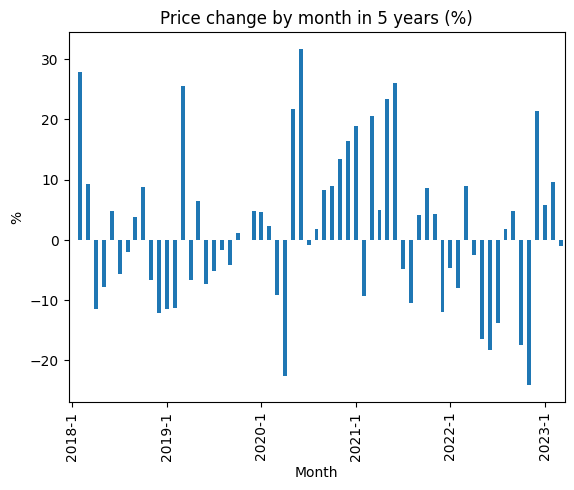

In [13]:
# Format the date to be more readable
stock_smallest_day_new['Date'] = stock_smallest_day_new['year'].astype(str) + '-' + stock_smallest_day_new['month'].astype(str)
# Don't include time in the date

stock_smallest_day_new.set_index('Date', inplace=True)

stock_smallest_day_new['Price_change'].plot(kind='bar')  
plt.xlabel('Month')
plt.ylabel('%')
plt.title('Price change by month in 5 years (%)')
# Only show the first month of each year on the x-axis
plt.xticks(np.arange(0, len(stock_smallest_day_new), 12), stock_smallest_day_new.index[::12])

# Include the line showing the average percentage change of stock volume 


plt.show()

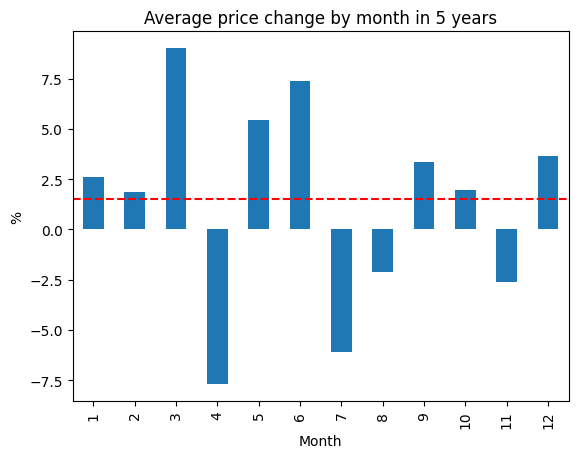

In [14]:
# Plot the average price change by month in 5 years
# Calculate average price change by month
stock_smallest_day_new.groupby('month')['Price_change'].mean().plot(kind='bar')  
plt.xlabel('Month')
plt.ylabel('%')
plt.title('Average price change by month in 5 years')
# draw a line for the average volume change by month 
plt.axhline(y=stock_smallest_day_new['Price_change'].mean(), color='r', linestyle='--')


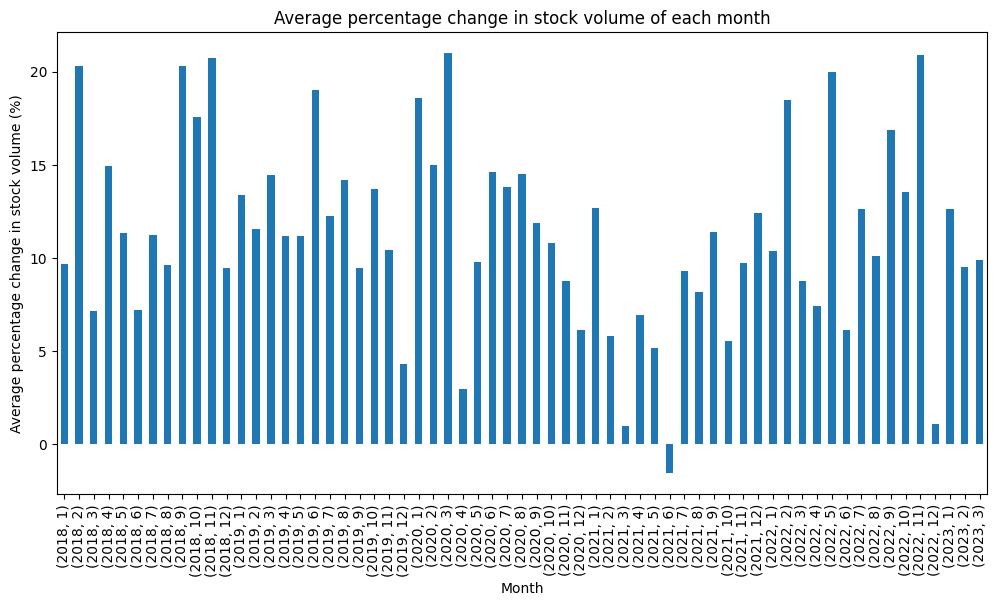

In [15]:
stock['percentage_change_volume'] = (stock['Vol.'] - stock['Vol.'].shift(1)) / stock['Vol.'].shift(1) * 100
average_percentage_change_volume = stock.groupby(['year','month'])['percentage_change_volume'].mean()
average_percentage_change_volume.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Month')
plt.ylabel('Average percentage change in stock volume (%)')
plt.title('Average percentage change in stock volume of each month')
plt.show()

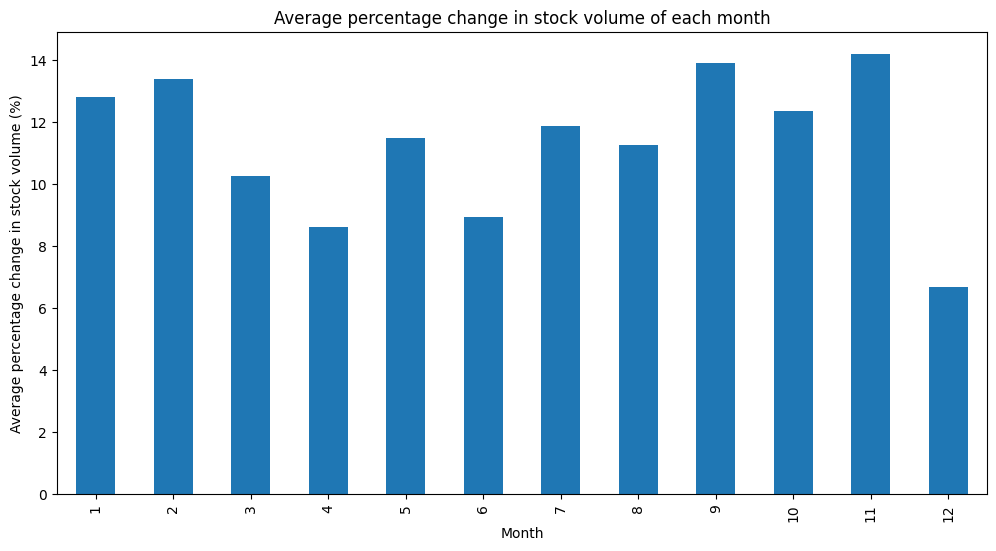

In [16]:
# Average percentage change in stock volume of each month 
stock['percentage_change_volume'] = (stock['Vol.'] - stock['Vol.'].shift(1)) / stock['Vol.'].shift(1) * 100
average_percentage_change_volume = stock.groupby(['month'])['percentage_change_volume'].mean()
average_percentage_change_volume.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Month')
plt.ylabel('Average percentage change in stock volume (%)')
plt.title('Average percentage change in stock volume of each month')
plt.show()
